<a href="https://colab.research.google.com/github/migarciaq/TAM-2025-2/blob/main/California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Generación y organización de los datos de entrada

In [2]:
# Make_regression dataset
N = 1000 # Samples
P = 20 # Features
X_mr, y_mr = make_regression(n_samples=N,n_features=P, noise=1, random_state=42)
print(X_mr.shape, y_mr.shape)

(1000, 20) (1000,)


In [3]:
# California_Housing Dataset
housing = fetch_california_housing()
X_h = housing.data ; y_h = housing.target
print(X_h.shape, y_h.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


#Trabajo en clase

**Regresión Líneal con regularización L2**

**1.   Modelo:**

El modelo de regresión lineal busca aproximar un vector de salida $y \in \mathbb{R}^N$ a partir de una matriz de características $X \in \mathbb{R}^{N \times P}$ y un vector de parámetros $\alpha \in \mathbb{R}^P$:

$$\hat{y} = X \alpha$$

donde:
- $N$: número de muestras (samples).
- $P$: número de características (features).
- $\alpha$: parámetros del modelo que queremos estimar.  

**2. Función de costo:**

Para regresión lineal con regularización L2 (Ridge Regression):

$$J(\alpha) = \| y - X \alpha \|_2^2 + \lambda \| \alpha \|_2^2$$

donde:
- $\| y - X \alpha \|_2^2 = y^Ty - 2y^TX\alpha^T + \alpha X^TX\alpha^T$
- $\lambda \| \alpha \|_2^2 = \lambda \alpha^T \alpha → $ Penalización para evitar sobreajuste (regularización).  
- $\lambda \geq 0 → $ Hiperparámetro de regularización.

## Visualización de los datasets

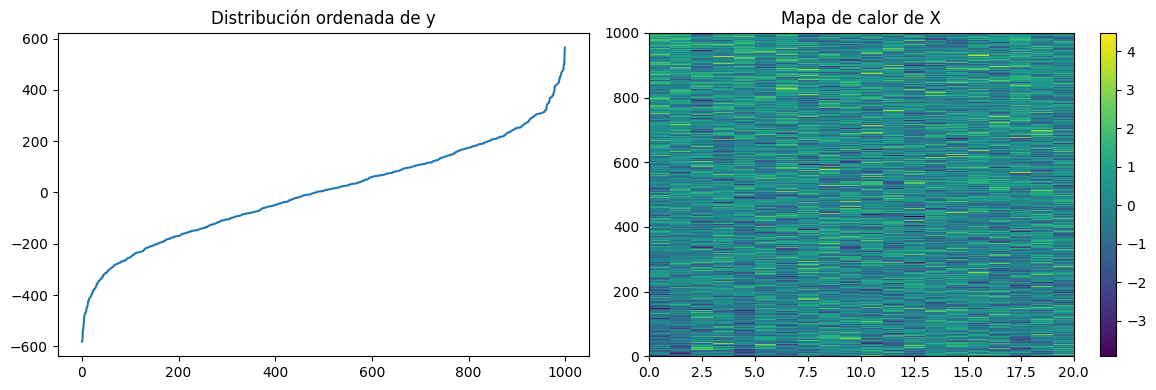

In [4]:
# Base de datos generada con Make_Regression
ind_mr = np.argsort(y_mr)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(np.sort(y_mr)); plt.title("Distribución ordenada de y")
plt.subplot(1,2,2)
plt.pcolormesh(X_mr[ind_mr]) ; plt.colorbar() ; plt.title("Mapa de calor de X")
plt.tight_layout(); plt.show()

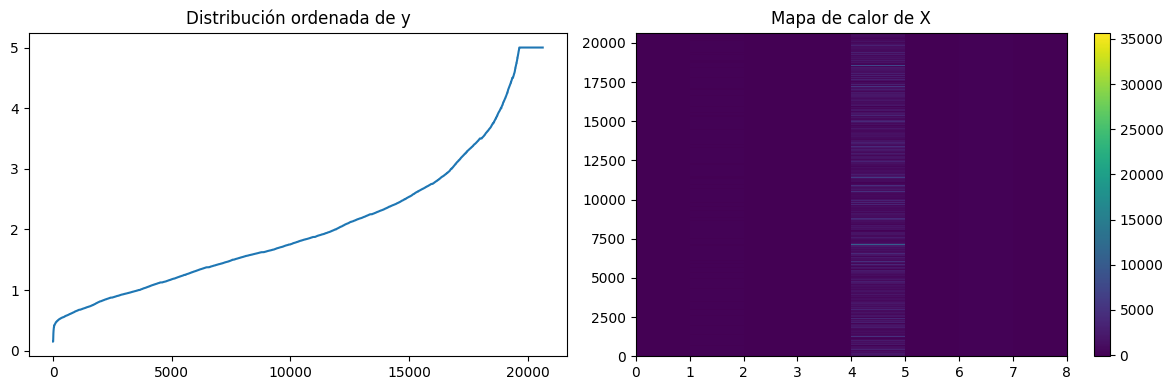

In [5]:
# Base de datos California_Housing
ind_h = np.argsort(y_h)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(y_h[ind_h]) ; plt.title("Distribución ordenada de y")
plt.subplot(1,2,2)
plt.pcolormesh(X_h[ind_h]) ; plt.colorbar() ; plt.title("Mapa de calor de X")
plt.tight_layout(); plt.show()

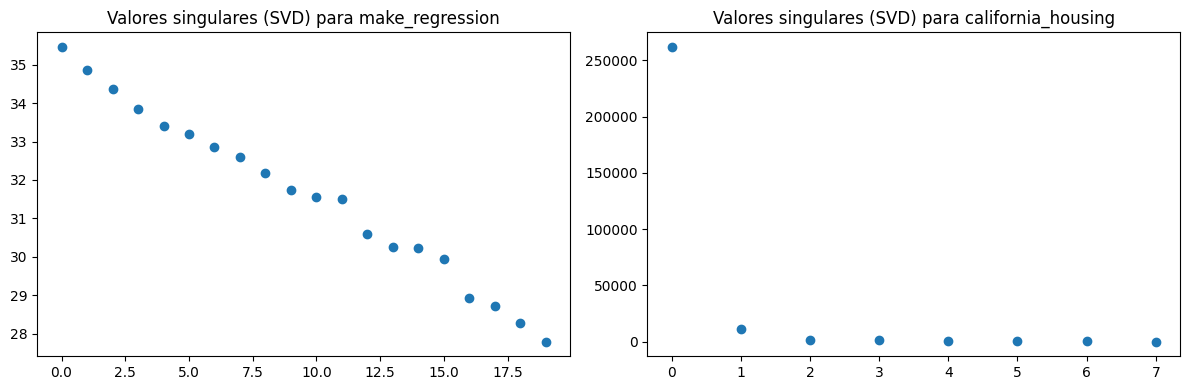

In [6]:
#Descomposición en valores singulares (SVD)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
U,S,Vh = np.linalg.svd(X_mr)
plt.scatter(np.arange(len(S)),S) ; plt.title("Valores singulares (SVD) para make_regression")
plt.subplot(1,2,2)
U,S,Vh = np.linalg.svd(X_h)
plt.scatter(np.arange(len(S)),S) ; plt.title("Valores singulares (SVD) para california_housing")
plt.tight_layout(); plt.show()

## Solución Analítica (Mínimos Cuadrados)

Resolver directamente derivando y despejando:

$$\alpha^* = (X^T X + \lambda I)^{-1} X^T y$$

donde:
- $I$: matriz identidad de tamaño $P \times P$.  

Esta solución existe siempre que $X^T X + \lambda I$ sea invertible (lo cual se garantiza con $\lambda > 0$).

In [7]:
# Función para calculo de α*
def mincua_reg(X,y,lamb_ = 1e-3): #fit,opt
  alpha = np.linalg.inv(X.T.dot(X) + lamb_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

### Solución Analítica (Make_Regression)

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02] 



Text(0.5, 1.0, 'Visualización de los coeficientes α*')

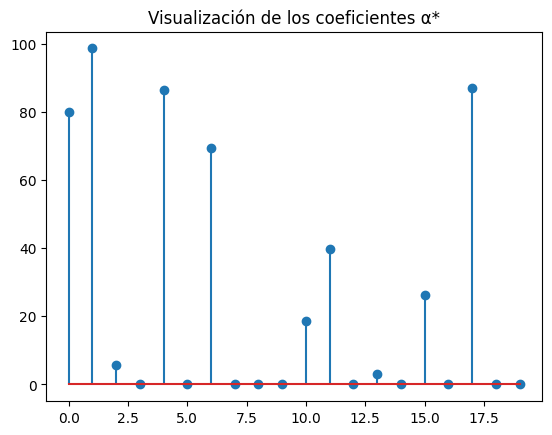

In [8]:
# Cálculo de α*
alpha_mr = mincua_reg(X_mr, y_mr); print(alpha_mr,"\n")
# Visualización de los coeficientes α*
plt.stem(np.arange(len(alpha_mr)),np.abs(alpha_mr))
plt.title("Visualización de los coeficientes α*")

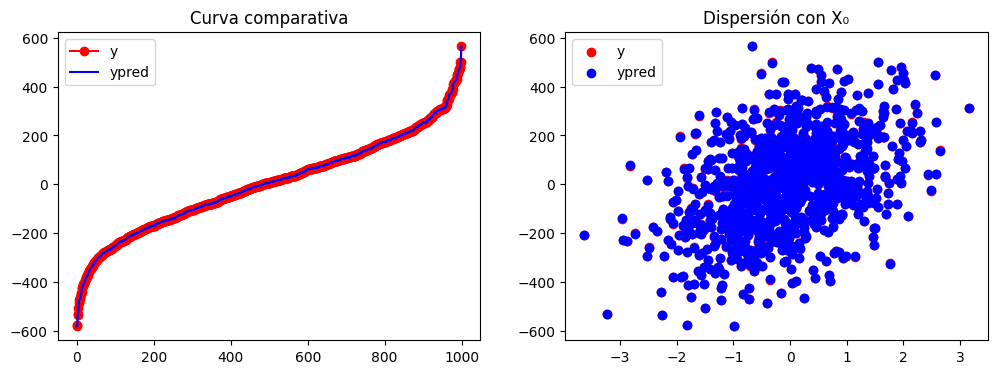

<Figure size 640x480 with 0 Axes>

In [9]:
#Valores reales y predichos
ypred = X_mr.dot(alpha_mr)

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(y_mr[ind_mr], c='r',marker='o', label = 'y'); plt.plot(ypred[ind_mr], c ='b', label = 'ypred')
plt.title("Curva comparativa") ; plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_mr[ind_mr,0],y_mr[ind_mr], c='r',marker='o', label = 'y')
plt.scatter(X_mr[ind_mr,0],ypred[ind_mr], c ='b', label = 'ypred')
plt.title("Dispersión con X₀"); plt.legend(); plt.show()
plt.tight_layout(); plt.show()

#Tarea

- Encontrar α* analitico para el dataset California_Housing
- Realizar la solución iterativa para ambos datasets (Make_Regression, California_Housing).

## Solución Analitica (California_Housing)

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02] 



<StemContainer object of 3 artists>

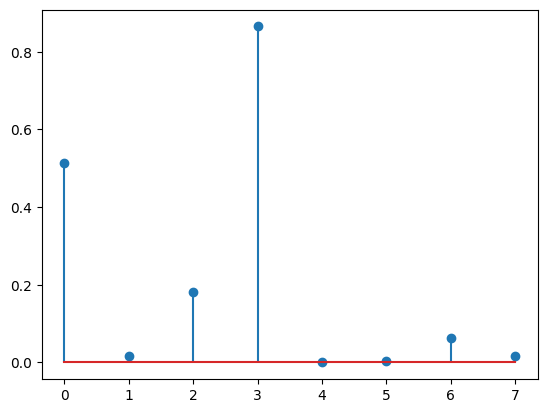

In [10]:
# Cálculo de α*
alpha_housing = mincua_reg(X_h,y_h); print(alpha_housing,"\n")
# Visualización de los coeficientes de α*
plt.stem(np.arange(len(alpha_housing)),np.abs(alpha_housing))

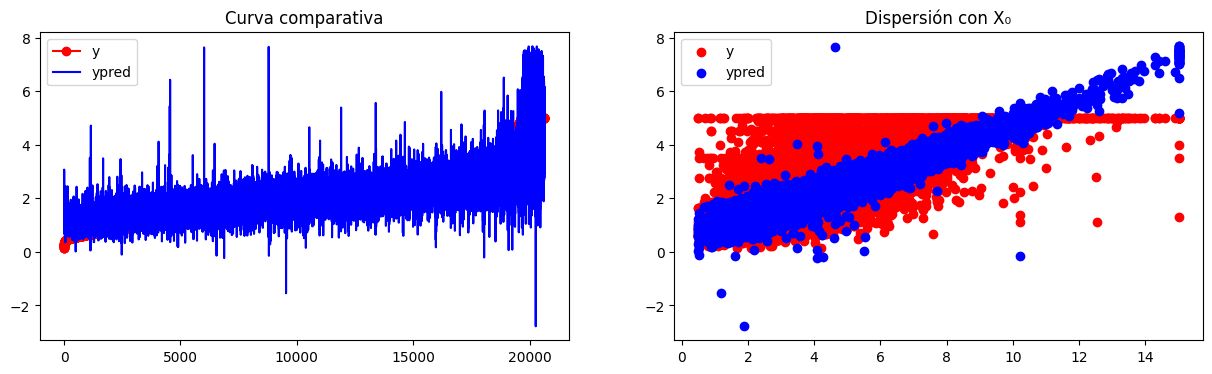

<Figure size 640x480 with 0 Axes>

In [11]:
#Valores reales y predichos
ypred_housing = X_h.dot(alpha_housing)

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.plot(y_h[ind_h], c='r',marker='o', label = 'y'); plt.plot(ypred_housing[ind_h], c ='b', label = 'ypred')
plt.title("Curva comparativa") ; plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_h[ind_h,0],y_h[ind_h], c='r',marker='o', label = 'y')
plt.scatter(X_h[ind_h,0],ypred_housing[ind_h], c ='b', label = 'ypred')
plt.title("Dispersión con X₀"); plt.legend(); plt.show()
plt.tight_layout(); plt.show()

## Solución Iterativa (Descenso por Gradiente)


El gradiente de $J(\alpha)$ respecto a $\alpha$ es:

$$\nabla_\alpha J(\alpha) = -2 Y^T x + 2 \alpha X^T X +  2 \lambda  \alpha$$

Con ello se utiliza el **descenso por gradiente**, actualizando iterativamente los parámetros:

$$\alpha_{t} = \alpha_{t-1} - \eta \, \nabla_\alpha J(\alpha)$$

donde:
- $\eta →$ Tasa de aprendizaje.  
- $\nabla_\alpha J(\alpha) →$ Gradiente en la iteración $t$.  

Sustituyendo el gradiente:

$$\alpha_{t} = \alpha^{t-1} - \eta \left( -2 X^T y + 2 \alpha X^T X  + 2 \lambda \alpha \right)$$

In [12]:
# SOLUCIÓN ITERATIVA (Descenso por Gradiente)

def grad_desc(X,y,n,lam,tol,iter=100000):
  alpha_i = np.zeros(X.shape[1])
  hist_alpha = [alpha_i.copy()]

  for _ in range(iter):
      grad = -2 * X.T.dot(y) + 2 * X.T.dot(X).dot(alpha_i) + 2*lam*alpha_i # Gradiente
      alpha_n = alpha_i - n * grad

      if np.linalg.norm(alpha_n - alpha_i) < tol:
          break
      alpha_i = alpha_n
      hist_alpha.append(alpha_i.copy())

  last_alpha = hist_alpha[-1]
  print(last_alpha)
  print(f"\nIteraciones = {len(hist_alpha)-1}\n")

  return alpha_i, hist_alpha

# FUNCIÓN DE COSTO (loss)

def cost_function(alpha,X,y,lam):
  return y.T.dot(y) - 2*y.T.dot(X.dot(alpha.T)) + alpha.dot(X.T.dot(X.dot(alpha.T)))+ lam*alpha.T.dot(alpha)

### Solución Iterativa (Make_Regression)

[ 7.99976981e+01  9.85709683e+01  5.56721430e+00  3.05967509e-02
  8.64514984e+01 -4.35467941e-02  6.94212162e+01 -3.84144888e-03
  1.06737509e-02 -2.16426533e-02  1.86113764e+01  3.96501429e+01
  6.18294952e-03  3.09624720e+00 -4.76260226e-02  2.63918266e+01
 -3.65071421e-02  8.68710156e+01  3.62510484e-02  1.41528371e-02]

Iteraciones = 4415



<StemContainer object of 3 artists>

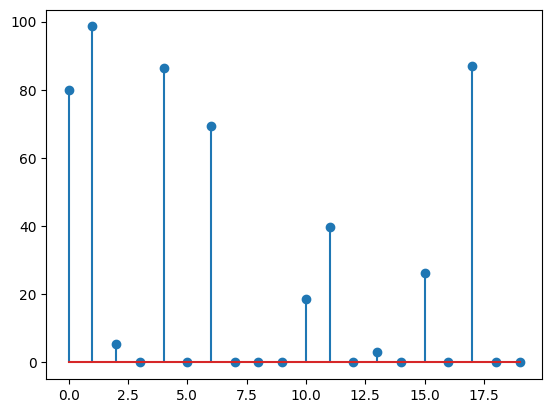

In [13]:
# Visualización de los coeficientes de α
n = 1e-6; lam = 1e-3;  tol= 1e-4
alphaite_mr, histalpha_mr = grad_desc(X_mr,y_mr,n=n,lam=lam,tol=tol)
plt.stem(np.arange(len(alphaite_mr)),np.abs(alphaite_mr))

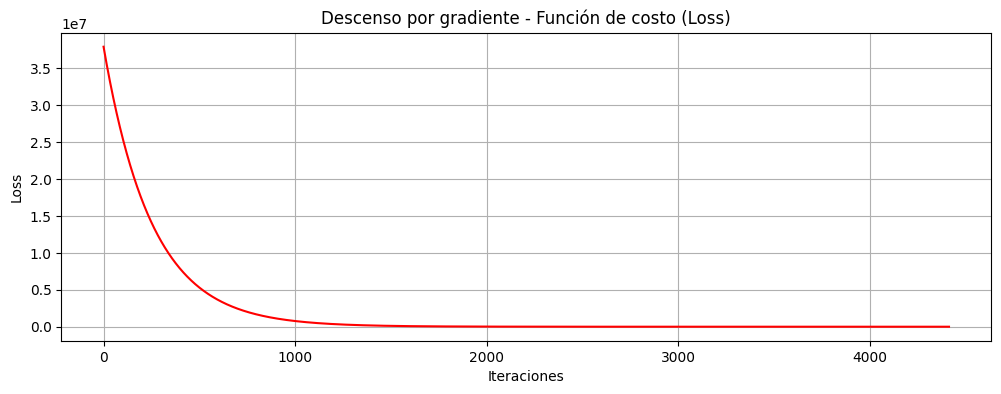

In [14]:
# Calculo del historial de costos
hist_cost = [cost_function(alpha, X_mr, y_mr,1e-3) for alpha in histalpha_mr]

# Grafica de la evolución de la función de costo
plt.figure(figsize=(12, 4))
plt.plot(hist_cost, c='r')
plt.xlabel("Iteraciones"); plt.ylabel("Loss")
plt.title("Descenso por gradiente - Función de costo (Loss)")
plt.grid(True); plt.show()

In [15]:
# Diferencia entre ambas soluciones
print("\nSolución Analítica:\n", alpha_mr); print("\nSolución Iterativa:\n", alphaite_mr)
diff = np.linalg.norm(alpha_mr - alphaite_mr)
print("\nDiferencia entre soluciones:", diff)


Solución Analítica:
 [ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]

Solución Iterativa:
 [ 7.99976981e+01  9.85709683e+01  5.56721430e+00  3.05967509e-02
  8.64514984e+01 -4.35467941e-02  6.94212162e+01 -3.84144888e-03
  1.06737509e-02 -2.16426533e-02  1.86113764e+01  3.96501429e+01
  6.18294952e-03  3.09624720e+00 -4.76260226e-02  2.63918266e+01
 -3.65071421e-02  8.68710156e+01  3.62510484e-02  1.41528371e-02]

Diferencia entre soluciones: 0.05706827551675378


### Solución Iterativa (California_Housing)

[ 0.53283233  0.11451357  0.06796916 -0.04583769 -0.00655132 -0.02373292
 -0.12759519 -0.07954684]

Iteraciones = 2946



<StemContainer object of 3 artists>

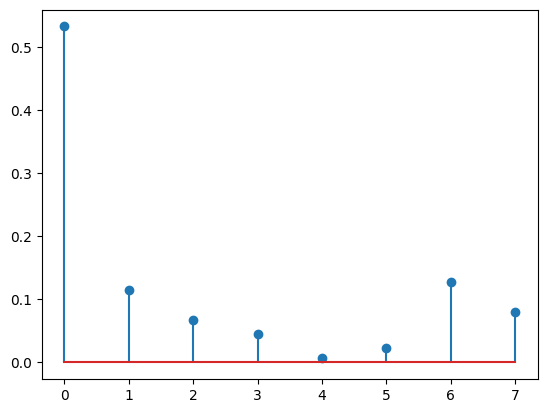

In [16]:
# Visualización de los coeficientes de α
scaler = StandardScaler()
Xh_s = scaler.fit_transform(X_h)

n= 1e-8; lam= 1e3; tol= 1e-4
alphaite_h, histalpha_h = grad_desc(Xh_s,y_h,n=n,lam=lam,tol=tol)
plt.stem(np.arange(len(alphaite_h)),np.abs(alphaite_h))

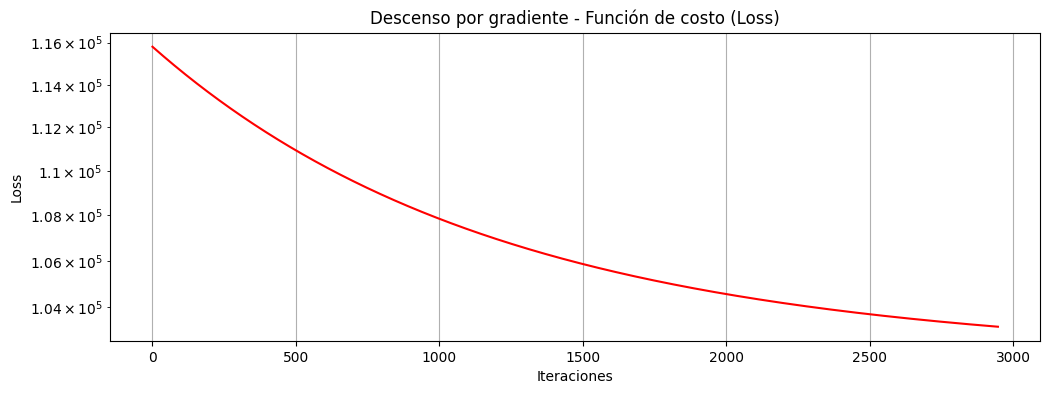

In [17]:
# Calculo del historial de costos
hist_cost_h = [cost_function(alpha, Xh_s, y_h,1e3) for alpha in histalpha_h]

# Grafica de la evolución de la función de costo
plt.figure(figsize=(12, 4))
plt.yscale('log')
plt.plot(hist_cost_h, c='r')
plt.xlabel("Iteraciones"); plt.ylabel("Loss")
plt.title("Descenso por gradiente - Función de costo (Loss)")
plt.grid(True); plt.show()

In [18]:
# Diferencia entre ambas soluciones
print("\nSolución Analítica:\n", alpha_housing); print("\nSolución Iterativa:\n", alphaite_h)
diff = np.linalg.norm(alpha_housing - alphaite_h)
print("\nDiferencia entre soluciones:", diff)


Solución Analítica:
 [ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]

Solución Iterativa:
 [ 0.53283233  0.11451357  0.06796916 -0.04583769 -0.00655132 -0.02373292
 -0.12759519 -0.07954684]

Diferencia entre soluciones: 0.9545392646667455
